
# Описание проекта
Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

Инструкция по выполнению проекта

# Шаг №1. Загрузите данные и подготовьте их к анализу

Загрузите данные о заведениях общественного питания Москвы. Убедитесь, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработайте их.


# Шаг №2. Анализ данных

1)Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

2)Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

3)Для какого вида объекта общественного питания характерно сетевое распространение?

4)Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

5)Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

6)Выделите в отдельный столбец информацию об улице из столбца address .

7)Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

8)Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

9)Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

10)Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.



In [6]:



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
from IPython.display import Image
from IPython.core.display import HTML

In [7]:
rest_data = pd.read_csv('F:/dataset/rest_data.csv')

In [10]:
rest_data.head(10)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


In [12]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [13]:
rest_data['object_type'].unique() 

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

Смотрим основные типы заведений

In [14]:
rest_data['number'].unique()

array([  48,   35,   95,   40,   50,  240,   10,   90,  150,  120,    5,
         24,  140,   32,  270,  320,    7,    2,  160,   20,   30,  110,
          6,  192,   65,   45,    4,  125,  100,   49,   63,   70,   22,
         56,   38,  220,   78,    3,   80,   46,   15,   96,   60,   47,
        180,  250,  200,   25,   12,   14,   16,  420,   98,   75,   34,
        216,   43,   54,  580,  159,    0,   28,   64,   67,   42,  124,
         82,   36,  114,    8,   71,   18,  158,   55,  196,   44,   76,
        144,   41,   26,   68,  143,  198,   79,    1,   86,  148,  190,
        202,  131,   52,   92,  300,   85,  102,   88,   84,  246,   81,
         94,   23,   37,   39,   99,   61,   11,  130,   74,  128,  106,
         58,  260,   27,   19,   29,   13,    9,  168,  350,   93,   33,
        105,  239,  104,   17,   62,  230,  132,   87,   89,  170,   83,
         21,  108,  210,   51,   53,  115,   66,  280,  126,   97,  356,
        156,  428,  380,  138,   72,  118,  139,  2

In [15]:
rest_data.duplicated().sum()

0

Думаю лучше проверить точнее сами столбцы отделено на количество и природу диблированных значений

In [16]:
print('ID',rest_data['id'].duplicated().sum())
print('Object_name',rest_data['object_name'].duplicated().sum())
print('Chain',rest_data['chain'].duplicated().sum())
print('Adress',rest_data['address'].duplicated().sum())
print('Number',rest_data['number'].duplicated().sum())


ID 0
Object_name 4973
Chain 15364
Adress 6258
Number 15051


Самое главное `ID` по данному столбцу нет дубликатов

Меня немного смущают данные цифры, решил посмотреть на таблицу более детально, что бы хотябы иметь визуальное представление с каими данными мы будем работать

In [17]:
print('Object_name',rest_data['object_name'].value_counts())
print('----')
print('Chain',rest_data['chain'].value_counts())
print('----')
print('Adress',rest_data['address'].value_counts())
print('----')
print('Number',rest_data['number'].value_counts())

Object_name Столовая                                                       267
Кафе                                                           236
Шаурма                                                         234
KFC                                                            155
Шоколадница                                                    142
Макдоналдс                                                     122
Бургер Кинг                                                    122
Домино'с Пицца                                                  86
Теремок                                                         84
Крошка Картошка                                                 82
Пекарня                                                         76
Милти                                                           65
Суши Wok                                                        61
Буфет                                                           59
СТОЛОВАЯ                                          

### Микровывод:
 - В целом я считаю дубликаты не могут угрожать нашему иследованию, так как мы видим много сетевых и франшихных заведений
 - Смущают заведения где цифра посадочных мест `0`, единсвенное предположение заведения работают только на доставку и вынос еды

In [18]:
rest_data.isnull().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

Пропусков нет, думаю можно продолжить без проверки по стобцам

## Выводы по Шагу №1:
- Пропуски отсуствуют 
- Природа дублированных значений посмотрена, это ситивики, франшизы и тд которые часто могут находить на одной улице, самое главное что  `ID` дубликатов нет
  ### Считаю что можно перейти к второму шагу, первичное ознокомление с данными не дало каких либо "артефактов" 
  
 

# Шаг №2. Анализ данных

### 1) Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

In [19]:
type_and_number = rest_data.groupby('object_type')['number'].count().reset_index().sort_values('number', ascending = False)

In [20]:
type_and_number

,object_type,number
3,кафе,6099
8,столовая,2587
7,ресторан,2285
6,предприятие быстрого обслуживания,1923
0,бар,856
1,буфет,585
4,кафетерий,398
2,закусочная,360
5,магазин (отдел кулинарии),273


In [21]:
type_and_number
fig = px.bar(type_and_number, x="object_type", y="number",  color='object_type', title='Cоотношение видов объектов общественного питания по количеству')
fig.update_xaxes(tickangle=45)
fig.show()

#### Микровывод: 
Больше всего заведений(по убыванию):

   
   
- кафе	                               6099
- столовые	                           2587
- рестораны	                           2285
- предприятие быстрого обслуживания	   1923
- бары	                                856
- буфеты	                            585
- кафетерий	                            398
- закусочные	                        360
- магазины (отдел кулинарии)	        273

### 2)Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

In [22]:
chain_and_number = rest_data.groupby('chain')['number'].count().reset_index().sort_values('number', ascending = False)

In [23]:
chain_and_number

,chain,number
1,нет,12398
0,да,2968


In [24]:
chain_and_number
fig = px.bar(chain_and_number, x="chain", y="number",  color='chain', title='Cоотношение сетевых и несетевых заведений по количеству')
fig.update_xaxes(tickangle=45)
fig.show()

In [25]:
12398 / 2968

4.17722371967655

#### Микровывод:
- Несетевых заведений больше в четыре раза

### 3)Для какого вида объекта общественного питания характерно сетевое распространение?

In [26]:
type_chain_number = []
type_chain_number = rest_data[rest_data['chain'] == 'да']
type_chain_number_df = type_chain_number.groupby('object_type')['chain'].count().reset_index().sort_values('chain', ascending = False)




In [27]:
type_chain_number_df

,object_type,chain
3,кафе,1396
6,предприятие быстрого обслуживания,791
7,ресторан,544
5,магазин (отдел кулинарии),78
2,закусочная,56
4,кафетерий,52
0,бар,37
1,буфет,11
8,столовая,3


In [28]:
type_chain_number_df
fig = px.bar(type_chain_number_df, x="object_type", y="chain",  color='object_type', title='Характер сетевое распространение')
fig.update_xaxes(tickangle=45)
fig.show()

#### Микровывод:
Самые популярные точки общественного питаня - это кафе около 40% заведений. На втором месте столовые - 16,8%. Третье и четвертое место почти равные рестораны - 15%, ПБО - 12,5.

### 4)Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [29]:
print(rest_data.query('chain == "да"')['number'].mean())

52.91981132075472


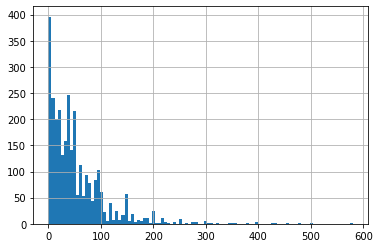

In [30]:
rest_data.query('chain == "да"')['number'].hist(bins = 100)

Из гистрограмы не совсем понятно и видно, у нас много сетевых заведений с `0`, так окей, скорее всего сетевики работают на вынос либо доставка, либо тут что-то не так с юр.адресом. 

Дальше идут более крупные цифры `100` и больше, единственное что приходит в голову это ТЦ.

В целом мы видим что основноые цифры это `0` -  `100`

Я делаю следущее предположение, все что меньше `30` мест это маленькое количество мест, все что больше `30` то большое количество мест

In [31]:
rest_number = rest_data.query('chain =="да"')

In [32]:
rest_number_small= rest_number.query('number < 30')

In [34]:
rest_number_small.head()

,id,object_name,chain,object_type,address,number
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
16,144107,Суши Wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
25,81554,Домино'с Пицца,да,кафе,"город Москва, Алтуфьевское шоссе, дом 56",24
33,69243,Суши Wok,да,кафе,"город Москва, проспект Андропова, дом 30",4
38,127980,Хлеб насущный,да,кафе,"город Москва, улица Арбат, дом 6/2",20


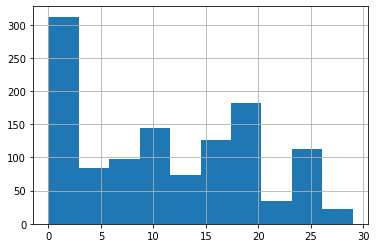

In [35]:
rest_number_small['number'].hist()

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

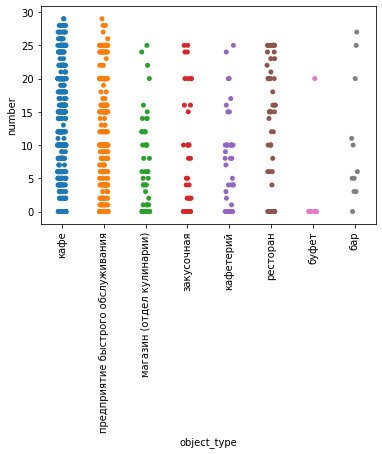

In [36]:
sns.stripplot(x='object_type',y='number', data=rest_number_small)
plt.xticks(rotation=90)

In [37]:
rest_number_big = rest_number.query('number > 30')

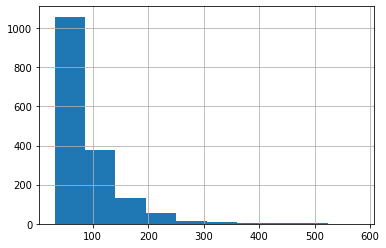

In [38]:
rest_number_big['number'].hist()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

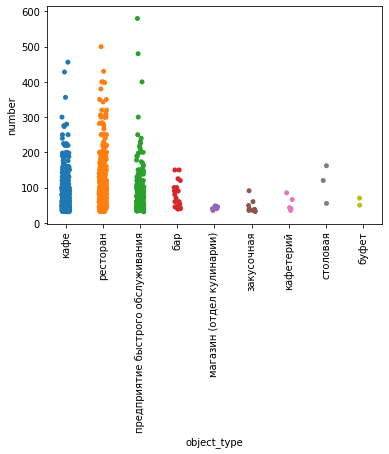

In [39]:
sns.stripplot(x='object_type',y='number', data=rest_number_big)
plt.xticks(rotation=90)

In [40]:
hi = px.scatter(rest_number_small, x='object_type', y='number', color='object_type')
fx = px.scatter(rest_number_big, x='object_type', y='number', color='object_type')

hi.show()
fx.show()

In [41]:
small = rest_number_small['number'].value_counts().sum()
big = rest_number_big['number'].value_counts().sum()
print('Кол-во условно маленьких заведений ', small)
print('Кол-во условно больших заведений ', big)

Кол-во условно маленьких заведений  1188
Кол-во условно больших заведений  1658


### 5) Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

In [42]:
rest_number_count_2 = (rest_data.groupby('object_type', as_index=False)
                        .agg({'number':'mean'})
                        .rename(columns={'number':'number_mean'})
                        .sort_values(by='number_mean', ascending=False)
               )

In [44]:
fig = go.Figure()

for object_type in rest_number_count_2['object_type']:
    fig.add_trace(go.Box(y=rest_data.loc[rest_data['object_type'] == object_type,'number'],
                         name=object_type,
                         boxpoints='outliers',
                         boxmean=True,
                         marker_color='#4592af'
                        )
             )

fig.update_layout(title='Распределение посадочных мест по типу заведения',
                  title_font_size=23,
                  height=650,
                  plot_bgcolor='#eeeeee',
                  yaxis_title='Кол-во посадочных мест',
                  xaxis_tickangle=-30,
                  showlegend=False,
                  yaxis_range=[-10,400]
                 )


<Наибольшее среднее количество посадочных мест у столовых - 130 штук. Это очевидно, потому что в короткий срок нужно накормить большое количество человек. На втором месте рестораны 97 мест, на третьем буфет около 50 мест

### 6) Выделите в отдельный столбец информацию об улице из столбца address .

In [45]:
rest_data['street'] = rest_data['address'].str.extract(pat='\,([а-яА-я0-9\-\s]+)\,')

In [46]:
rest_data[['address','street']].head(10)

,address,street
0,"город Москва, улица Егора Абакумова, дом 9",улица Егора Абакумова
1,"город Москва, улица Талалихина, дом 2/1, корпус 1",улица Талалихина
2,"город Москва, Абельмановская улица, дом 6",Абельмановская улица
3,"город Москва, Абрамцевская улица, дом 1",Абрамцевская улица
4,"город Москва, Абрамцевская улица, дом 9, корпус 1",Абрамцевская улица
5,"город Москва, Абрамцевская улица, дом 15, корп...",Абрамцевская улица
6,"город Москва, переулок Сивцев Вражек, дом 6/2",переулок Сивцев Вражек
7,"город Москва, Авиамоторная улица, дом 8, строе...",Авиамоторная улица
8,"город Москва, Авиамоторная улица, дом 8, строе...",Авиамоторная улица
9,"город Москва, Авиамоторная улица, дом 8, строе...",Авиамоторная улица


7) Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [47]:
top_street = rest_data['street'].value_counts()

In [48]:
top_street.head(10)

 город Зеленоград          232
 проспект Мира             204
 Профсоюзная улица         182
 Ленинградский проспект    171
 Пресненская набережная    167
 Варшавское шоссе          161
 Ленинский проспект        147
 поселение Сосенское       138
 проспект Вернадского      132
 Кутузовский проспект      114
Name: street, dtype: int64

In [49]:
top_10_street = rest_data['street'].value_counts().head(10)

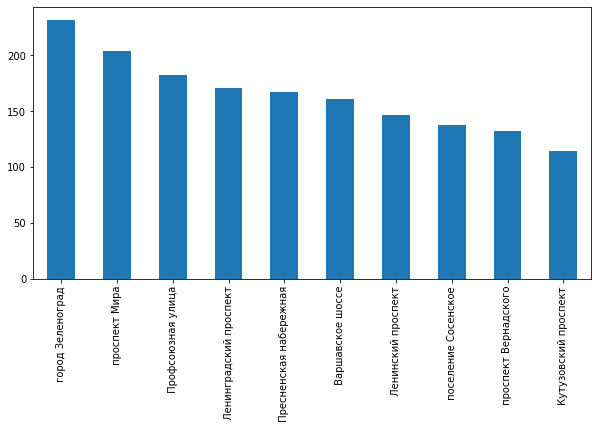

In [50]:
top_10_street.plot(kind= 'bar',figsize=(10,5));

я долго думал что делать с Зеленоградом, википедия дает что Зеленоград это часть Москвы, но логика говорит что никто не поедет в зеленоград, наставник из группы в слаке говоирит можно не придовать этому значения, так что я в будущем не обращал на это значение


Мы не будем учитывать город Зеленоград и поселение Сосенское, так как они находятся прилично за МКАД, и вряд ли туда поедут люди ради нашего кафе, к нам добавляются Каширское шоссе и Кировоградская улица. (Ссылка на карту: https://yandex.ru/maps/?um=constructor%3A8a2c8bac7b80bc477af40930bc116158dbf32c80b17dae10cd5ce277bbbe9090&source=constructorLink)


Больше всего заведений находятся на Западе и Юго-западе Москвы

In [ ]:
#need_delet = ['город', 'поселение', 'посёлок', 'проектируемый', 'деревня', '' ]

In [ ]:
''''def msk_only():
    rest_data_street = rest_data
    need_delet = ['город', 'поселение', 'посёлок', 'проектируемый', 'деревня', '' ]
    for i in range(len(rest_data)):
        if rest_data['street'][i] in need_delet:
            rest_data = rest_data.drop([i])
    return rest_data'''
# хотел написать ф-ии, но ошибка

In [ ]:
#msk_only()

### 8) Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос в каких районах Москвы находятся эти улицы?

In [51]:
street_low = rest_data['street'].value_counts().rename_axis('street').reset_index(name='count')

In [52]:
street_low = street_low.query('count < 2 ')

In [53]:
street_low.head(5)

,street,count
1294,Глинистый переулок,1
1295,шоссе Фрезер,1
1296,улица Недорубова,1
1297,Газгольдерная улица,1
1298,Тихая улица,1


In [54]:
street_low['count'].count()

546

У нас получается 546 улиц, на которых расположено только одно заведение. Перебирать их все нет смысла, сделаем репрезентативную выборку c погрешностью 15%. Получилось, что 29 заведений, должны нам показать приблизительную картину. (https://yadi.sk/d/awvkBDP37OIhXw)

Возьмем 29 случайных улиц, и посмотрим в каких районах они находятся.

In [55]:
df_elements = street_low.sample(n=29)

In [56]:
df_elements.head()

,street,count
1835,6-й Лучевой просек,1
1740,Якиманский переулок,1
1469,1-й Кожуховский проезд,1
1516,Северодвинская улица,1
1519,1-я Боевская улица,1


In [57]:
street_new=rest_data[['street','number']]

In [58]:
street_new.head()

,street,number
0,улица Егора Абакумова,48
1,улица Талалихина,35
2,Абельмановская улица,95
3,Абрамцевская улица,40
4,Абрамцевская улица,50


Как видим, большинство улиц находится в центре москвы в пределах ТТК(Третьего транспортного кольца). Ссылка на карту: https://yandex.ru/maps/?um=constructor%3A985a41e29db04707943c1d90fe8fb4cec59f49b93485f065e567aaf940ac346c&source=constructorLink

Понимаю что можно через API яндекс карт, но к сожелению не успевал, надеюсь так можно, опять же боюсь сборного проекта 2, хотел бы им занимать долго и внимательно

### 9) Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [59]:
address = rest_data['street'].value_counts().rename_axis('street').reset_index(name='count')

In [60]:
street_new = street_new.pivot_table(index='street', values='number',aggfunc='sum')

In [61]:
street_new = street_new.sort_values(by='number',ascending=False).head(12).reset_index()

In [62]:
street_new

,street,number
0,город Зеленоград,17050
1,проспект Мира,12790
2,Кутузовский проспект,9697
3,Ленинский проспект,9330
4,Ленинградский проспект,9010
5,проспект Вернадского,8840
6,Варшавское шоссе,8513
7,Профсоюзная улица,8447
8,Пресненская набережная,7656
9,Измайловское шоссе,6934


Найдем количество мест на каждое заведение

In [63]:
address = address.merge(street_new, on='street')

In [64]:
address

,street,count,number
0,город Зеленоград,232,17050
1,проспект Мира,204,12790
2,Профсоюзная улица,182,8447
3,Ленинградский проспект,171,9010
4,Пресненская набережная,167,7656
5,Варшавское шоссе,161,8513
6,Ленинский проспект,147,9330
7,проспект Вернадского,132,8840
8,Кутузовский проспект,114,9697
9,Кировоградская улица,110,6577


In [65]:
address1 = address.sort_values(by='number')

In [66]:
address['stat'] = (address['number'] / address['count']).round()

In [67]:
address

,street,count,number,stat
0,город Зеленоград,232,17050,73.0
1,проспект Мира,204,12790,63.0
2,Профсоюзная улица,182,8447,46.0
3,Ленинградский проспект,171,9010,53.0
4,Пресненская набережная,167,7656,46.0
5,Варшавское шоссе,161,8513,53.0
6,Ленинский проспект,147,9330,63.0
7,проспект Вернадского,132,8840,67.0
8,Кутузовский проспект,114,9697,85.0
9,Кировоградская улица,110,6577,60.0


In [68]:
address['stat'].median()

63.0

In [69]:
address_stat = address.sort_values(by='stat')

In [71]:
fig = px.bar(address, x='street', y='stat',
             title='Среднее количество посадочных мест на одно заведение ',
             height=500,width=700)
fig.update_layout(
    yaxis=dict(title='Количество посадочных мест на одно заведение'),
    xaxis=dict(title='Улица заведений'))
fig.show()

# Вывод

Кафе самые популярные заведения в Москве, по итогу иследования лучше открыть его

В среднем нужно расчитывать на 40 - 60 посадочных мест

Для открытия нового кафе с роботами-официантами можно рассматривать  Западный, Юго-западны Москвы

На этих районах примерно одинаковое число посадочных мест, а значит достаточное количество потенциальных клиентов. Конкуренция в данном случае будет играть на руку новому кафе - очень много захотят попробовать. Из них может быть сформирован пул постоянных клиентов. Плюс иногда посетители могут менять свои заведения, и этим тоже можно будет воспользоваться.   

Точно не стоит открывать заведение, где нет или всего один конкурент - по причине отсутствия большого количества клиентов, бизнес может быстро разорится.  

В случае успешного запуска возможно расширения бизнеса и создания сети. Сетевых заведений в 4 раза меньше, чем несетевых. В сетевых заведения преимущественно кафе. Т.е. еще один повод для возможного дальнейшего расширения.
